<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/results/M5_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print('cuda: ', torch.cuda.is_available())

2.1.0+cu121
cuda:  True


In [2]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [ ]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

In [4]:
from scripts.yaml_utils import *
from scripts.TRAIN import *

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


obtaining preformance: 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


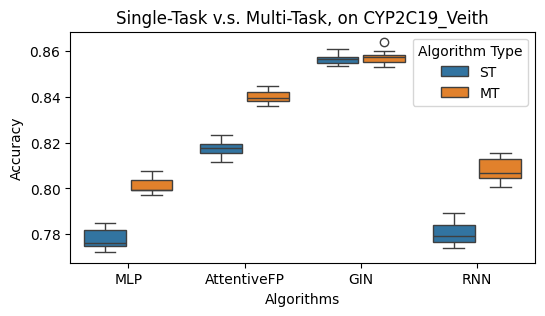

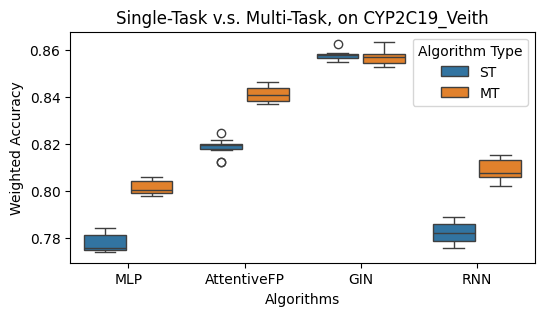

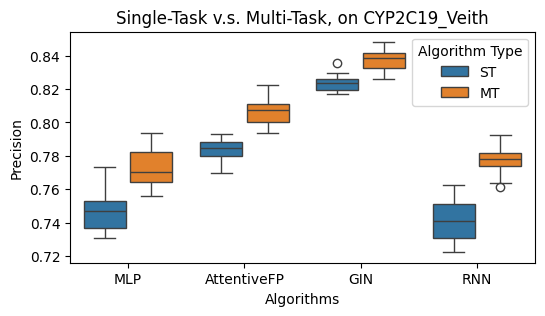

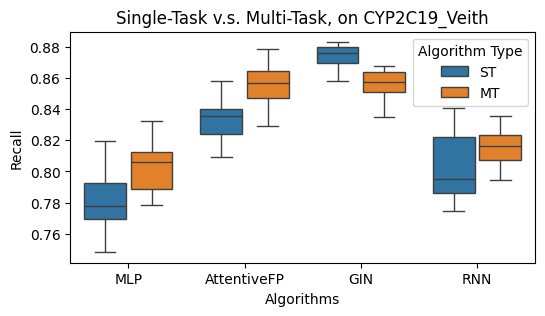

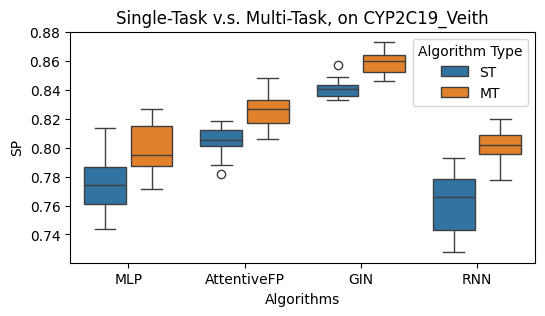

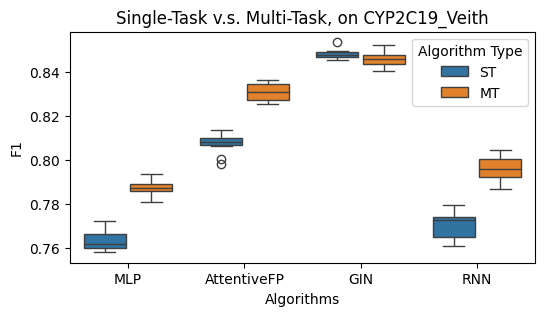

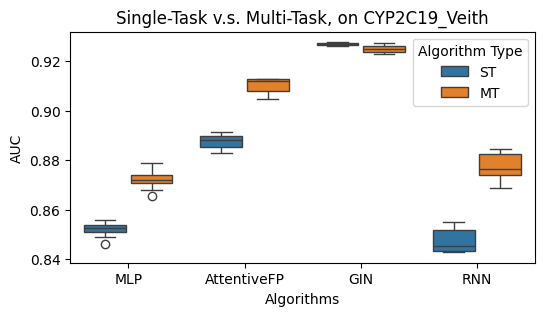

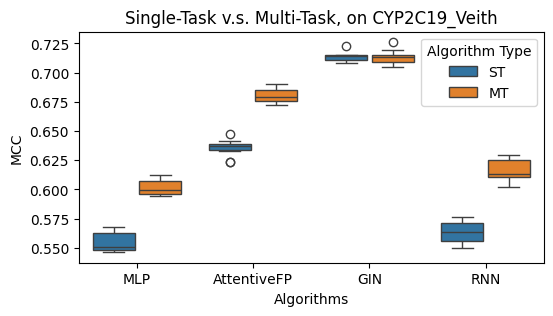

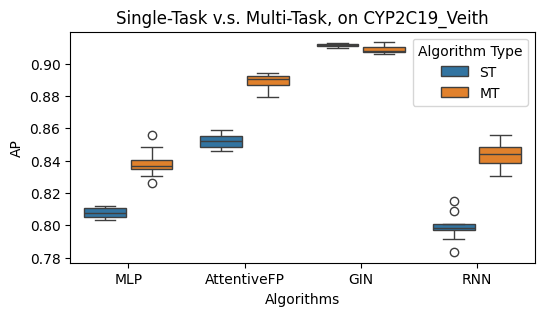

obtaining preformance: 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


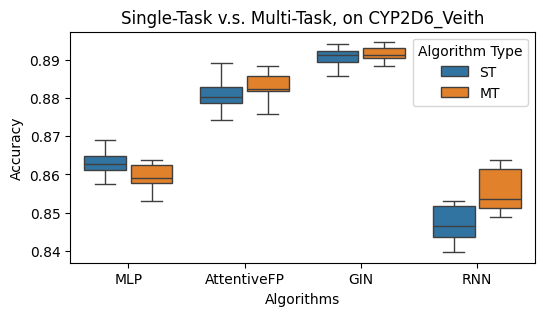

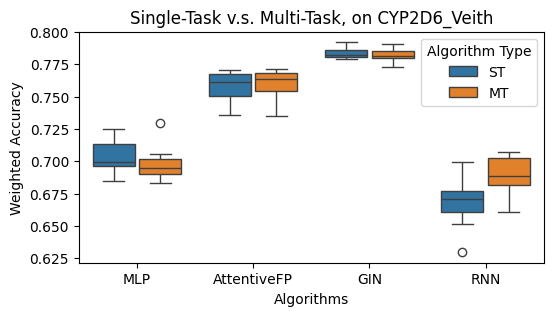

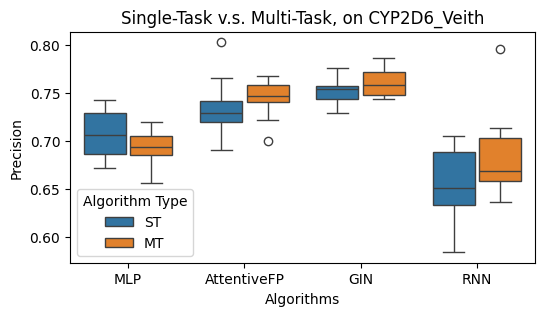

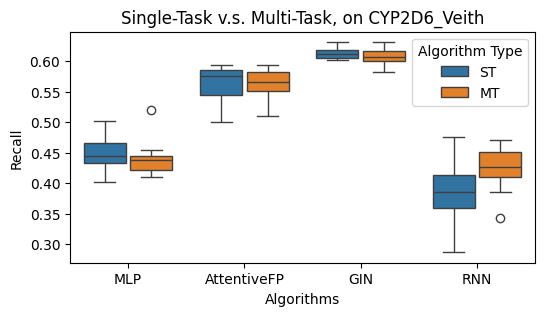

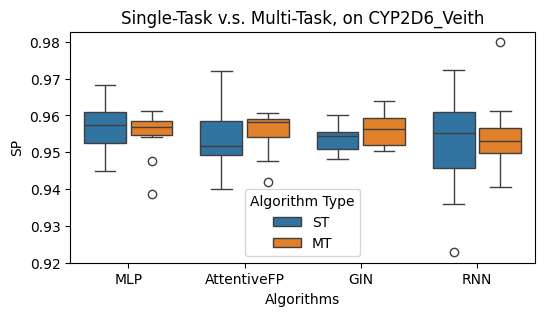

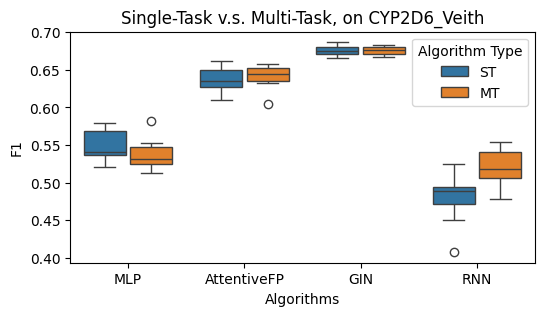

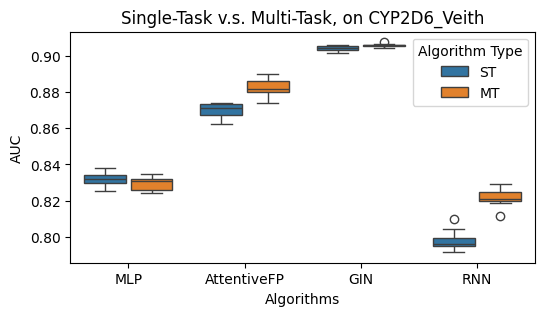

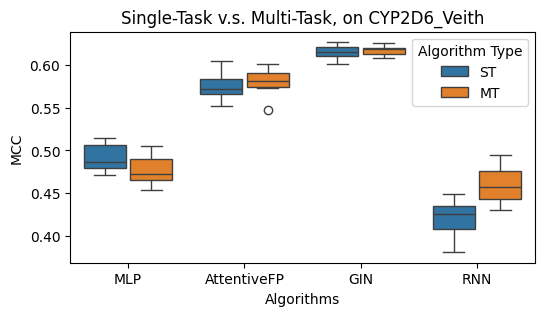

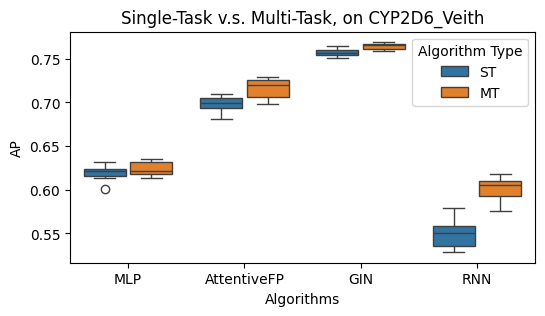

obtaining preformance: 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


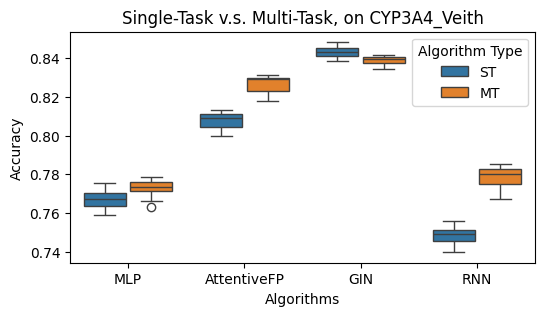

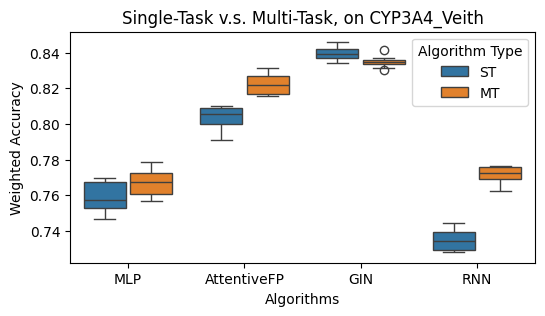

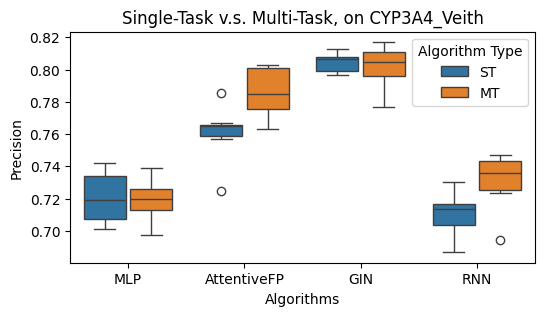

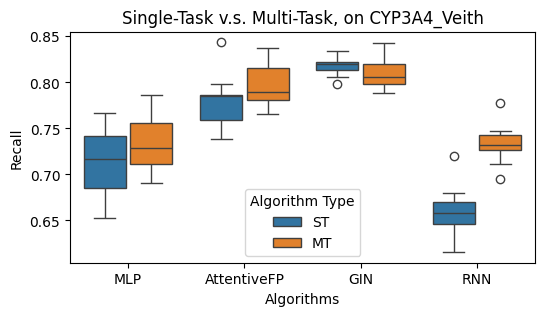

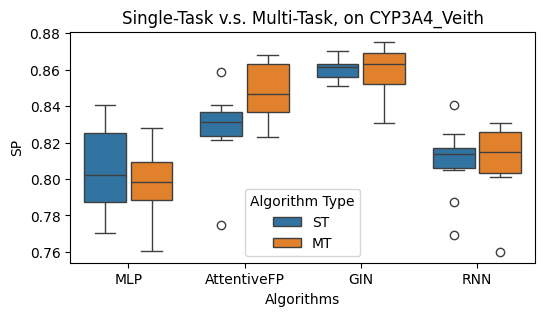

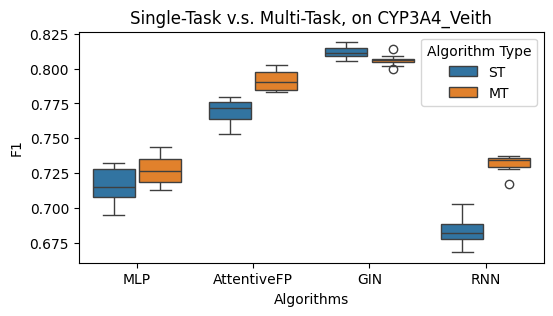

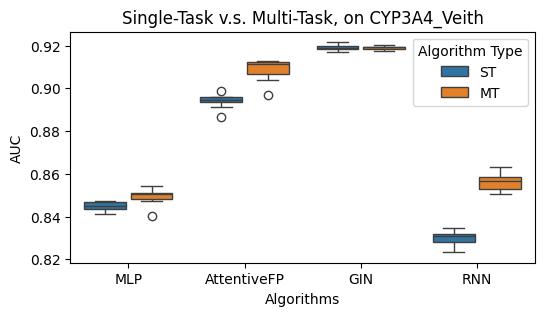

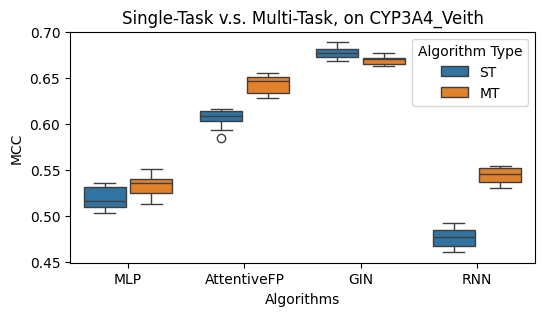

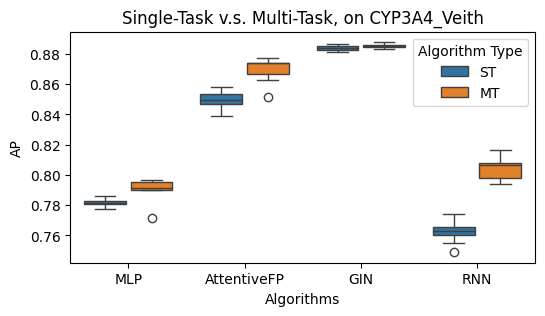

obtaining preformance: 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


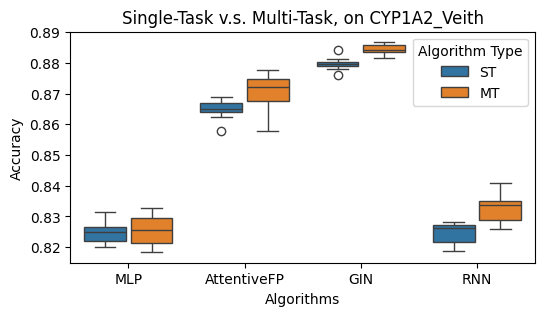

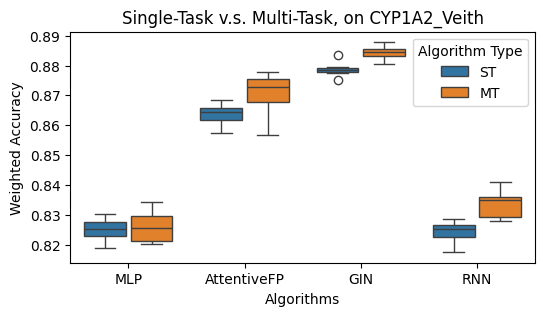

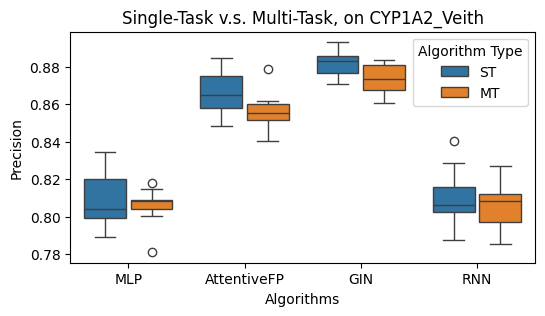

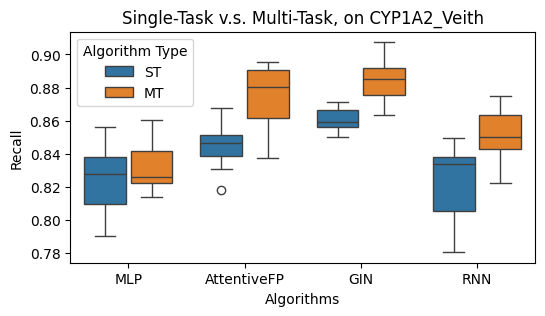

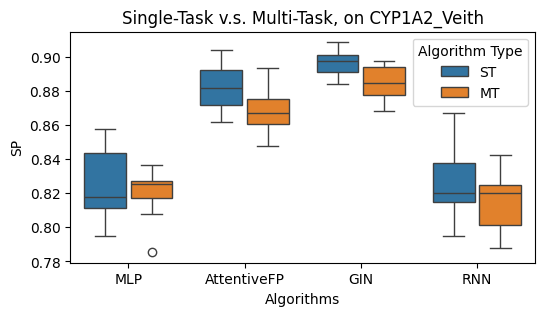

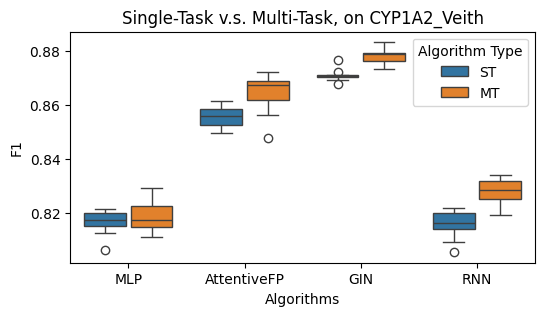

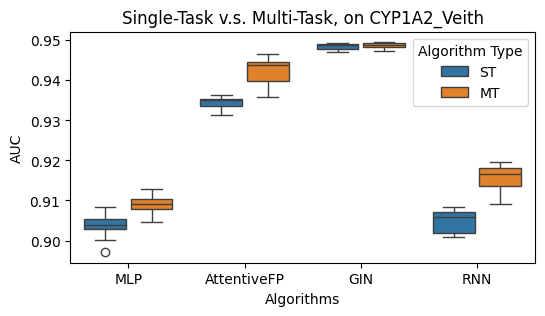

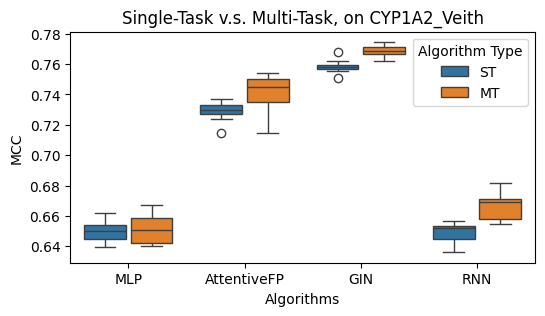

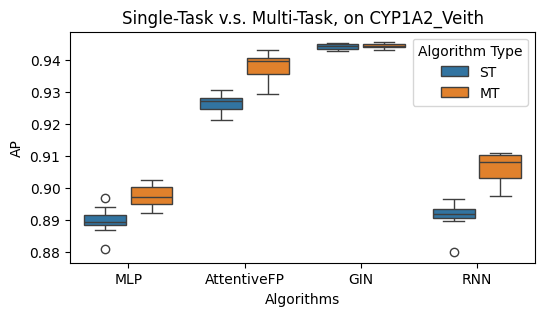

obtaining preformance: 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


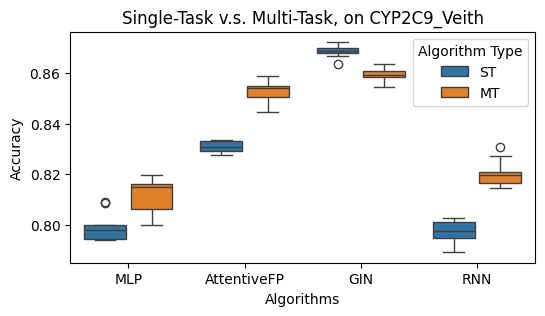

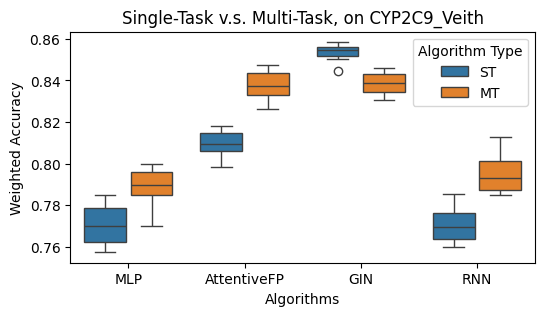

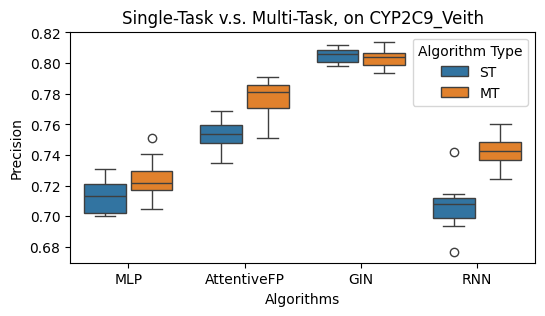

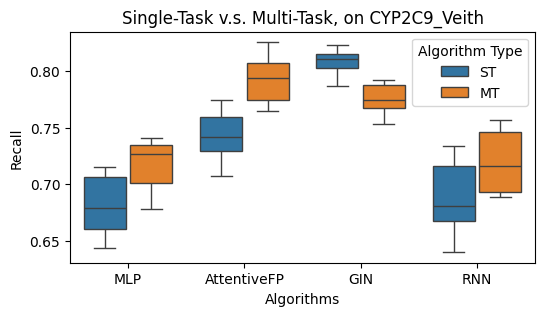

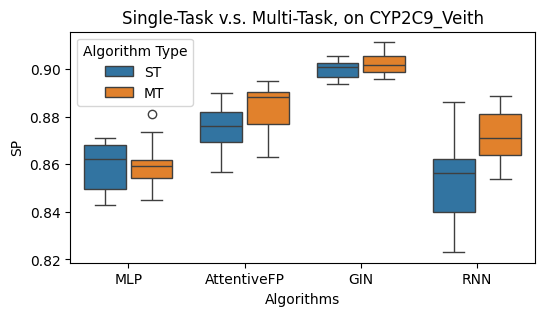

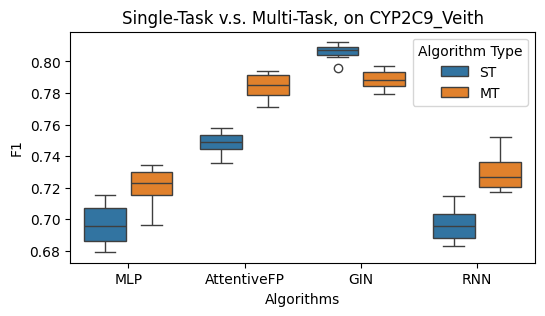

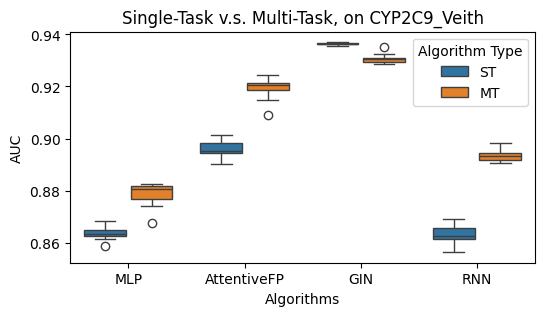

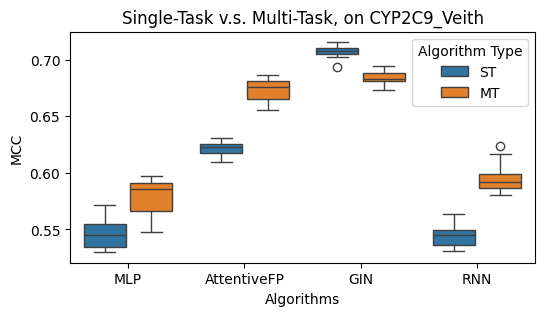

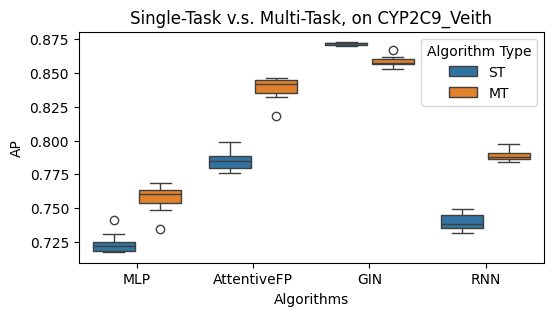

In [25]:
def visualize_M5(name, repeat_times=3):
    from tqdm import tqdm
    model_types = ['MLP', 'AttentiveFP', 'GIN', 'RNN']

    dict_ST = {}
    dict_MT = {}
    for model_type in tqdm(model_types, total=len(model_types),
                           desc='obtaining preformance'):
        dict_ST[model_type] = []
        dict_MT[model_type] = []
        for i in range(repeat_times):
            try:
                p_ST = yml_report(f'ST/{name}/{model_type}_ST_{i}.yml')
                dict_ST[model_type].append(p_ST[name])
            except: print(f'cannot open ST/{name}/{model_type}_ST_{i}.yml')
            try:
                p_MT = yml_report(f'M5/uw_no/{model_type}_MT_{i}.yml')
                dict_MT[model_type].append(p_MT[name])
            except: print(f'cannot open M5/uw_no/{model_type}_MT_{i}.yml')

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np

    # Sample data (assuming you have 3 runs for each algorithm type)
    CLS_METRICS = ['Accuracy', 'Weighted Accuracy', 'Precision', 'Recall', 'SP',
                'F1', 'AUC', 'MCC', 'AP']
    for met_num in range(len(cls_metrics)):
        data = {}
        data['Algorithm'] = model_types
        for i in range(repeat_times):
            data[f'ST_{i}'] = [dict_ST[model_type][i][met_num] for model_type in model_types]
            data[f'MT_{i}'] = [dict_MT[model_type][i][met_num] for model_type in model_types]



        # Convert data to long format for easier plotting
        df = pd.DataFrame(data)
        # print(df)
        df_long = pd.melt(df, id_vars=['Algorithm'], var_name='Run', value_name='Performance')

        # Extract Algorithm Type from Run column
        df_long['Algorithm Type'] = np.where(df_long['Run'].str.startswith('ST'), 'ST', 'MT')

        # Plot
        plt.figure(figsize=(6, 3))
        # sns.barplot(x='Algorithm', y='Performance', hue='Algorithm Type', data=df_long, ci='sd')
        sns.boxplot(x='Algorithm', y='Performance', hue='Algorithm Type', data=df_long, fill=True, gap=.1)
        # sns.boxplot(data=titanic, x="class", y="age", hue="alive", fill=False, gap=.1)

        plt.title(f'Single-Task v.s. Multi-Task, on {name}')
        plt.xlabel('Algorithms')
        plt.ylabel(f'{CLS_METRICS[met_num]}')
        plt.legend(title='Algorithm Type')
        plt.show()
        plt.close()

for name in names_M5:
    visualize_M5(name, repeat_times=10)
    print('\n\n')


# ST-*algorithm*

In [12]:
for name in names_M5:
    print('.'*30, name, '.'*30, '\n')
    for model_type in ['MLP','AttentiveFP', 'GIN', 'RNN']:
        print('='*25, 'ST-', model_type, '='*25)
        # p = train_mt(name, model_type, f'ST/{name}', 10, retrain=False, uw=False)
        perfs = []
        for i in range(10):
            p = yml_report(f'ST/{name}/{model_type}_ST_{i}.yml')
            perfs.append(p)
        eval_perf_list(perfs, name, {})
        print('\n\n\n')

.............................. CYP2C19_Veith .............................. 

========================= ST- MLP =========================
repeated num # 10 idx 2 has the lowest loss
******************** CYP2C19_Veith ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.778$\pm$0.004  &0.778$\pm$0.004  &0.747$\pm$0.013  &0.781$\pm$0.019  &0.775$\pm$0.020  &0.763$\pm$0.005  &0.852$\pm$0.003  &0.555$\pm$0.008  &0.808$\pm$0.003  
 idx 2: &0.785            &0.784            &0.761            &0.776            &0.793            &0.768            &0.854            &0.568            &0.805            





========================= ST- AttentiveFP =========================
repeated num # 10 idx 6 has the lowest loss
******************** CYP2C19_Veith ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |  

# MT-*algorithm*, no uncertainty weight

In [17]:
for name in names_M5:
    print('.'*30, name, '.'*30, '\n')
    for model_type in ['MLP','AttentiveFP', 'GIN', 'RNN']:
        print('='*25, 'MT-', model_type, '='*25)
        # p = train_mt(name, model_type, f'ST/{name}', 10, retrain=False, uw=False)
        perfs = []
        for i in range(10):
            p = yml_report(f'M5/uw_no/{model_type}_MT_{i}.yml')
            perfs.append(p)
        eval_perf_list(perfs, name, {})
        print('\n\n')

.............................. CYP2C19_Veith .............................. 

========================= MT- MLP =========================
repeated num # 10 idx 5 has the lowest loss
******************** CYP2C19_Veith ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.801$\pm$0.004  &0.801$\pm$0.003  &0.773$\pm$0.012  &0.803$\pm$0.016  &0.800$\pm$0.017  &0.788$\pm$0.003  &0.872$\pm$0.004  &0.602$\pm$0.006  &0.839$\pm$0.008  
 idx 5: &0.799            &0.800            &0.766            &0.812            &0.789            &0.788            &0.872            &0.599            &0.830            




========================= MT- AttentiveFP =========================
repeated num # 10 idx 6 has the lowest loss
******************** CYP2C19_Veith ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |   